# Energy Analytics - A Comprehensive Explorative Data Analysis of Electricity Consumption in Nigeria

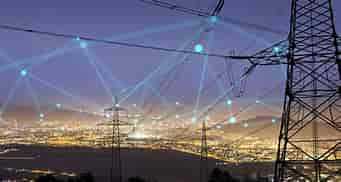

## 1.0 Objective

The objective of this project is to perform explorative data analysis on a synthetic smart metering data of about 98 prepaid meters of 2 of the 11 distribution companies (Discos) in Nigeria. We want to analyze the electricity consumption and usage across prepaid meters in a few households or offices in Nigeria in order to help optimize business processes of the Discos, enhance revenue, and improve customer experience. 

## 2.0 Dataset

The dataset used for this project is a synthetic data generated with the aid of some Python packages, from 3 real meter IDs of 3 prepaid meters on the bands 4, 5, and 6 from Ikeja Distribution Company and Jos Distribution Company. 

### 2.1 Data Collection, Preparation & Preprocessing

2.1.1 Data Collection

In [1]:
# import packages to get the synthetic data
import json
import random
from datetime import datetime, timedelta
import csv

In [2]:
# Define a function called 'generate_close_meter_ids'
def generate_close_meter_ids(base_ids, additional_count):
    all_ids = base_ids[:]
    for base_id in base_ids:
        base_id = int(base_id)
        all_ids.extend([str(base_id + random.randint(-1000, 1000)) for _ in range(additional_count // len(base_ids))])
    return all_ids

In [3]:
# Original meter IDs
original_meter_ids = ['47001635748', '54181199958', '60017070633']

In [4]:
# Generate 97 meter IDs close to the original ones
additional_count = 97
meter_ids = generate_close_meter_ids(original_meter_ids, additional_count)

In [5]:
# Sample data creation function
def create_sample_data(meter_ids):
    data = []
    for meter_id in meter_ids:
        for i in range(24):  # Create 24 hourly records
            data.append({
                "meter_id": meter_id,
                "timestamp": (datetime.now() - timedelta(hours=i)).strftime("%Y-%m-%dT%H:%M:%SZ"),
                "consumption_kwh": round(random.uniform(0.5, 2.0), 2),
                "voltage": round(random.uniform(220.0, 240.0), 1),
                "current": round(random.uniform(3.0, 6.0), 1),
                "frequency": 50.0
            })
    return data

In [6]:
# Create sample data
sample_data = create_sample_data(meter_ids)

In [7]:
# Convert the data to JSON and save to a file
with open("smart_metering_data.json", "w") as json_file:
    json.dump(sample_data, json_file, indent=4)

In [8]:
# Convert the JSON data to CSV
csv_file = "smart_metering_data.csv"

In [9]:
# Extract field names (keys) from the first entry in sample_data for the CSV header
fieldnames = sample_data[0].keys()

with open(csv_file, "w", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in sample_data:
        writer.writerow(entry)

print("Sample data has been written to smart_metering_data.json and smart_metering_data.csv")

Sample data has been written to smart_metering_data.json and smart_metering_data.csv


2.1.2 Data Cleaning

In [10]:
# import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df = pd.read_csv('smart_metering_data.csv')

# Check
df

,meter_id,timestamp,consumption_kwh,voltage,current,frequency
0,47001635748,2024-06-03T22:19:43Z,1.91,228.5,5.7,50.0
1,47001635748,2024-06-03T21:19:43Z,0.98,225.1,3.1,50.0
2,47001635748,2024-06-03T20:19:43Z,1.96,222.7,4.4,50.0
3,47001635748,2024-06-03T19:19:43Z,0.81,221.3,5.5,50.0
4,47001635748,2024-06-03T18:19:43Z,1.97,220.0,4.8,50.0
...,...,...,...,...,...,...
2371,60017071459,2024-06-03T03:19:43Z,0.80,229.9,3.1,50.0
2372,60017071459,2024-06-03T02:19:43Z,1.26,234.0,4.7,50.0
2373,60017071459,2024-06-03T01:19:43Z,1.12,224.4,5.6,50.0
2374,60017071459,2024-06-03T00:19:43Z,0.90,229.2,3.6,50.0


In [11]:
# check for null values
df.isnull().sum()

meter_id           0
timestamp          0
consumption_kwh    0
voltage            0
current            0
frequency          0
dtype: int64

No null values

In [12]:
# Get summary information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meter_id         2376 non-null   int64  
 1   timestamp        2376 non-null   object 
 2   consumption_kwh  2376 non-null   float64
 3   voltage          2376 non-null   float64
 4   current          2376 non-null   float64
 5   frequency        2376 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 111.5+ KB


In [13]:
# Create a function to split the timestamp
def split_timestamp(ts):
    date, time = ts.split('T')
    time = time.strip('Z')
    return date, time

# Apply the function and create new columns
df['date'], df['time'] = zip(*df['timestamp'].apply(split_timestamp))

In [14]:
# View the table
df.head()

,meter_id,timestamp,consumption_kwh,voltage,current,frequency,date,time
0,47001635748,2024-06-03T22:19:43Z,1.91,228.5,5.7,50.0,2024-06-03,22:19:43
1,47001635748,2024-06-03T21:19:43Z,0.98,225.1,3.1,50.0,2024-06-03,21:19:43
2,47001635748,2024-06-03T20:19:43Z,1.96,222.7,4.4,50.0,2024-06-03,20:19:43
3,47001635748,2024-06-03T19:19:43Z,0.81,221.3,5.5,50.0,2024-06-03,19:19:43
4,47001635748,2024-06-03T18:19:43Z,1.97,220.0,4.8,50.0,2024-06-03,18:19:43


In [15]:
# Drop 'timestamp' column
df.drop(columns=['timestamp'], inplace=True)
# Check
df.head()

,meter_id,consumption_kwh,voltage,current,frequency,date,time
0,47001635748,1.91,228.5,5.7,50.0,2024-06-03,22:19:43
1,47001635748,0.98,225.1,3.1,50.0,2024-06-03,21:19:43
2,47001635748,1.96,222.7,4.4,50.0,2024-06-03,20:19:43
3,47001635748,0.81,221.3,5.5,50.0,2024-06-03,19:19:43
4,47001635748,1.97,220.0,4.8,50.0,2024-06-03,18:19:43


In [16]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meter_id         2376 non-null   int64  
 1   consumption_kwh  2376 non-null   float64
 2   voltage          2376 non-null   float64
 3   current          2376 non-null   float64
 4   frequency        2376 non-null   float64
 5   date             2376 non-null   object 
 6   time             2376 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 130.1+ KB


2.1.3 Feature Engineering

In [17]:
# Create a 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + " " + df['time'])
df.set_index('datetime', inplace=True)
# Check
df.head()

,meter_id,consumption_kwh,voltage,current,frequency,date,time
datetime,,,,,,,
2024-06-03 22:19:43,47001635748,1.91,228.5,5.7,50.0,2024-06-03,22:19:43
2024-06-03 21:19:43,47001635748,0.98,225.1,3.1,50.0,2024-06-03,21:19:43
2024-06-03 20:19:43,47001635748,1.96,222.7,4.4,50.0,2024-06-03,20:19:43
2024-06-03 19:19:43,47001635748,0.81,221.3,5.5,50.0,2024-06-03,19:19:43
2024-06-03 18:19:43,47001635748,1.97,220.0,4.8,50.0,2024-06-03,18:19:43


In [18]:
# Check the data types for the dataset
df.dtypes

meter_id             int64
consumption_kwh    float64
voltage            float64
current            float64
frequency          float64
date                object
time                object
dtype: object

##  3.0 Explorative Data Analysis

### 3.1 Basic Statistics and Data Summary

3.1.1 Summary Statistics

In [19]:
# Descriptive statistics
df.describe()

,meter_id,consumption_kwh,voltage,current,frequency
count,2.376000e+03,2376.000000,2376.000000,2376.000000,2376.0
mean,5.373330e+10,1.251448,229.960816,4.477441,50.0
std,5.324080e+09,0.429128,5.760730,0.869543,0.0
min,4.700163e+10,0.500000,220.000000,3.000000,50.0
25%,4.700164e+10,0.880000,225.000000,3.700000,50.0
50%,5.418120e+10,1.250000,229.900000,4.400000,50.0
75%,6.001707e+10,1.620000,234.900000,5.200000,50.0
max,6.001707e+10,2.000000,240.000000,6.000000,50.0


3.1.2 Count of Meter Readings

In [20]:
# Count of 'meter_id' to understand usage patterns
df['meter_id'].value_counts()

meter_id
47001635748    48
60017071456    24
60017070950    24
60017070160    24
60017069978    24
               ..
47001635239    24
47001635096    24
47001635620    24
47001635218    24
60017071459    24
Name: count, Length: 98, dtype: int64

We have 98 meters in the dataset that we will use for analysis

### 3.2 Time Series Analysis

3.2.1 Trend Analysis

<Axes: title={'center': 'Electricity Consumption over Time'}, xlabel='datetime'>

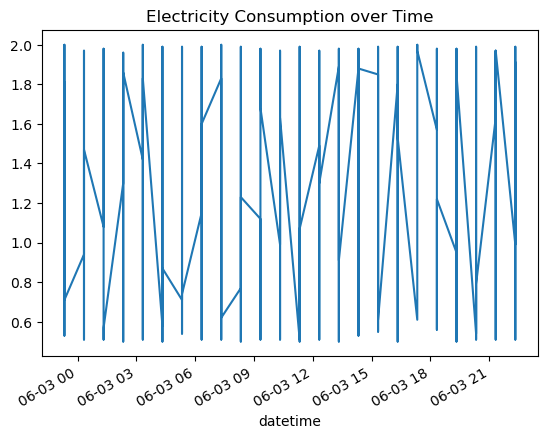

In [21]:
# Plot consumption over time
df['consumption_kwh'].plot(title='Electricity Consumption over Time')

The trend analysis shows that we only have lower limit of around 0.6 kwh and upper limit of around 2.0 kwh across the meter IDs sampled for consumption for the days analyzed.

3.2.2 Daily Pattern

In [22]:
# Aggregating by day
daily_consumption = df.resample("D").sum()
print("Daily Consumption:")
print(daily_consumption)

Daily Consumption:
                   meter_id  consumption_kwh   voltage  current  frequency  \
datetime                                                                     
2024-06-02    5319596907906           127.50   22724.1    434.6     4950.0   
2024-06-03  122350728881838          2845.94  523662.8  10203.8   113850.0   

                                                         date  \
datetime                                                        
2024-06-02  2024-06-022024-06-022024-06-022024-06-022024-0...   
2024-06-03  2024-06-032024-06-032024-06-032024-06-032024-0...   

                                                         time  
datetime                                                       
2024-06-02  23:19:4323:19:4323:19:4323:19:4323:19:4323:19:...  
2024-06-03  00:19:4300:19:4300:19:4300:19:4300:19:4300:19:...  


3.2.3 Visualizing the Aggregated data

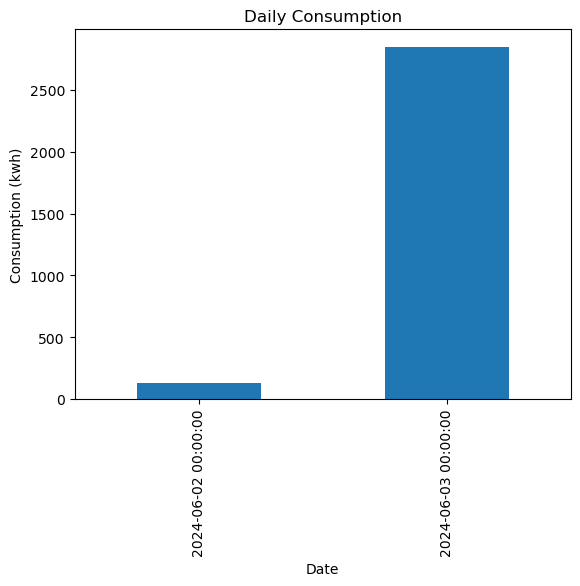

In [23]:
# Plot daily consumption
daily_consumption['consumption_kwh'].plot(kind='bar', title='Daily Consumption')
plt.xlabel("Date")
plt.ylabel("Consumption (kwh)")
plt.show()

Consumption is higher in total in the present day, compared to the previous day

### 3.3 Correlation Analysis

3.3.1 Correlation Matrix

In [24]:
correlation_matrix = df[['consumption_kwh', 'voltage', 'current']].corr()
correlation_matrix

,consumption_kwh,voltage,current
consumption_kwh,1.000000,-0.012383,-0.034033
voltage,-0.012383,1.000000,-0.076649
current,-0.034033,-0.076649,1.000000


There's negative correlation between consumption and voltage/current, while there's positive correlation between voltage and current

3.3.2 Visualizing the correlation matrix

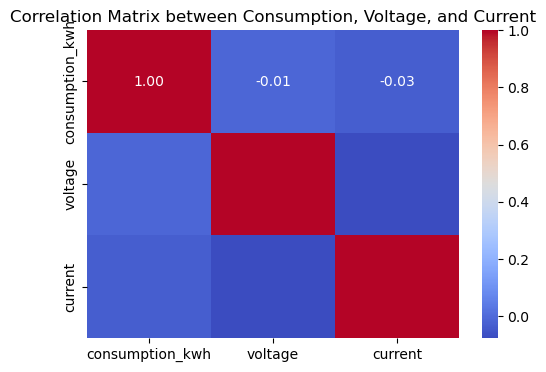

In [25]:
# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix between Consumption, Voltage, and Current")
plt.show()

### 3.4 Distribution Analysis

3.4.1 Histogram

array([[<Axes: title={'center': 'consumption_kwh'}>,
        <Axes: title={'center': 'voltage'}>],
       [<Axes: title={'center': 'current'}>,
        <Axes: title={'center': 'frequency'}>]], dtype=object)

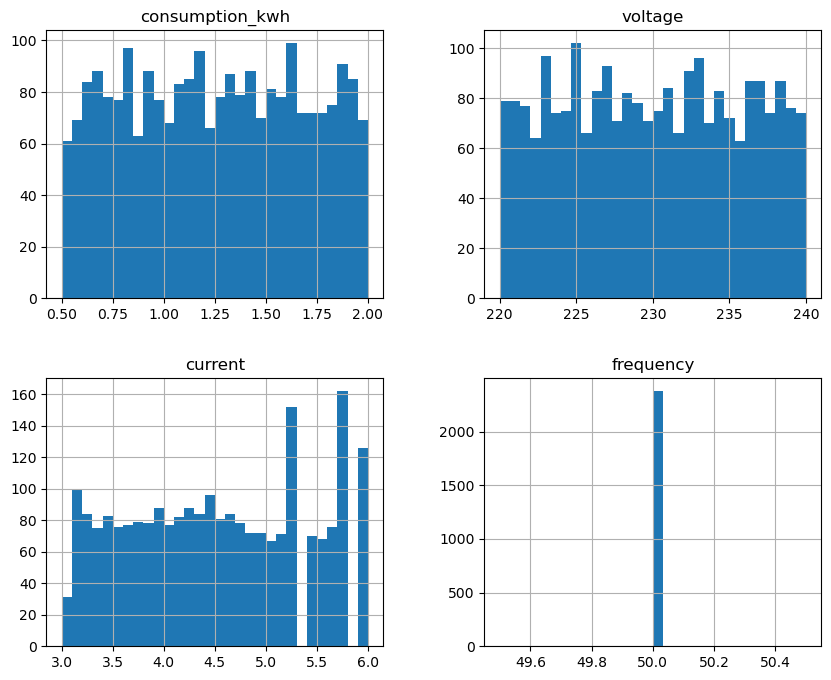

In [26]:
# Plot histograms of 'consumption_kwh', 'voltage', 'current', and 'frequency' to understand their distributions
df[['consumption_kwh', 'voltage', 'current', 'frequency']].hist(bins=30, figsize=(10,8))

3.4.2 Box Plots

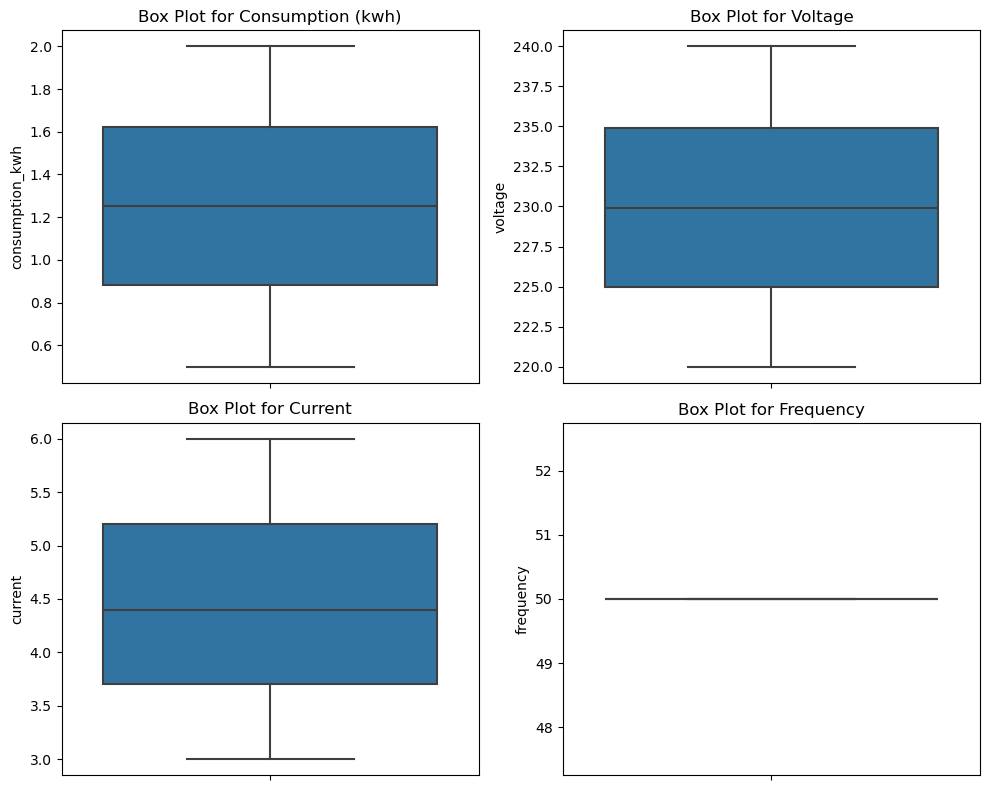

In [27]:
# Plot the box plots
plt.figure(figsize=(10,8))

# Box plot for 'consumption_kwh'
plt.subplot(2,2,1)
sns.boxplot(data=df, y='consumption_kwh')
plt.title('Box Plot for Consumption (kwh)')

# Box plot for 'voltage'
plt.subplot(2,2,2)
sns.boxplot(data=df, y='voltage')
plt.title('Box Plot for Voltage')

# Box plot for 'current'
plt.subplot(2,2,3)
sns.boxplot(data=df, y='current')
plt.title('Box Plot for Current')

# Box plot for 'frequency'
plt.subplot(2,2,4)
sns.boxplot(data=df, y='frequency')
plt.title('Box Plot for Frequency')

plt.tight_layout()
plt.show()

The box plots above show that there's not a single outlier in the dataset

### 3.5 Peak Consumption Analysis

3.5.1 Identify Peak Hours

In [28]:
# Convert 'time' and 'date' data types to datetime
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])
# Check
df.dtypes

C:\Users\user\AppData\Local\Temp\ipykernel_17528\3146605382.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


meter_id                    int64
consumption_kwh           float64
voltage                   float64
current                   float64
frequency                 float64
date               datetime64[ns]
time               datetime64[ns]
dtype: object

In [29]:
# Find out what times the consumption is highest
grouped_avg_consumption = df.groupby(df['time'].dt.hour)['consumption_kwh'].mean()
grouped_avg_consumption

time
0     1.251515
1     1.208485
2     1.292323
3     1.238485
4     1.239495
5     1.210404
6     1.240606
7     1.308788
8     1.237071
9     1.215152
10    1.205253
11    1.174949
12    1.228586
13    1.318687
14    1.226869
15    1.318485
16    1.246465
17    1.265556
18    1.322323
19    1.187980
20    1.299192
21    1.252525
22    1.257677
23    1.287879
Name: consumption_kwh, dtype: float64

<Axes: title={'center': 'Average Consumption by Hour'}, xlabel='time'>

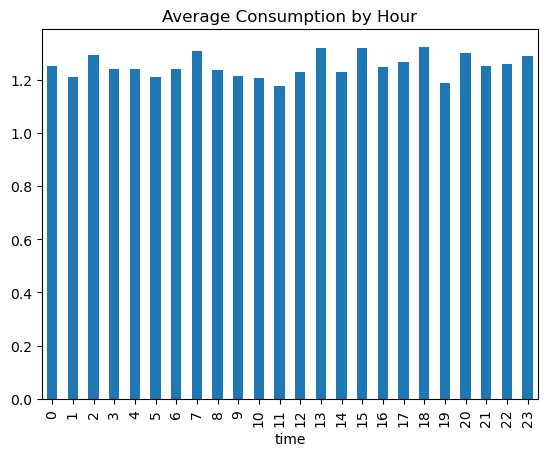

In [30]:
# Plot the times vs consumption
grouped_avg_consumption.plot(kind='bar', title='Average Consumption by Hour')

The average consumption is highest at 18:00 hour with the value of 1.32kwh, as at the time the analysis was conducted. *Hence, the peak hour is 18:00 hour*. 

**Personally, I think this might be due to the fact that most of these meters analyzed belong to residential areas and most residence return back from work around the 18:00 hour mark, hence load their meters with various electrical gadgets in the houses, which leads to high consumption and usage rate at this time. We may need to dig deeper to ascertain the reason consumption is highest at 18:00 hour.**

3.5.2 Consumption by Meter

In [31]:
# Compare consumption between meters
grouped_consumption_by_meters = df.groupby('meter_id')['consumption_kwh'].sum().sort_values(ascending=False)
grouped_consumption_by_meters

meter_id
47001635748    63.29
47001636481    33.60
60017071482    33.53
54181199029    33.42
60017071003    33.34
               ...  
60017071005    26.48
54181199397    26.42
47001635620    26.27
47001635671    25.04
60017070441    24.58
Name: consumption_kwh, Length: 98, dtype: float64

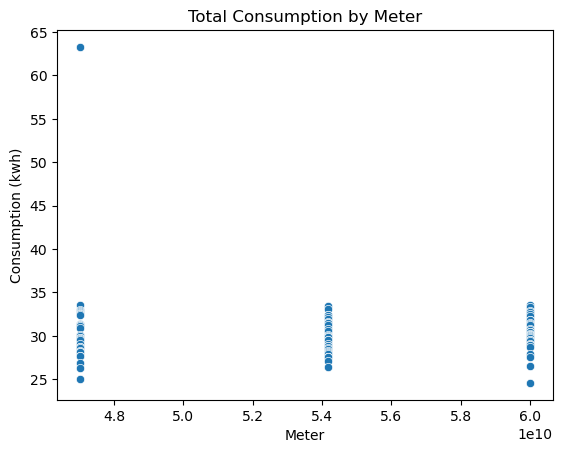

In [32]:
# Plot the relationship between meter_ids and consumption rate
grouped_consumption_by_meters = pd.DataFrame(grouped_consumption_by_meters)

sns.scatterplot(x=grouped_consumption_by_meters.index, y=grouped_consumption_by_meters['consumption_kwh'])
plt.title('Total Consumption by Meter')
plt.xlabel('Meter')
plt.ylabel('Consumption (kwh)')
plt.show()

The meter_ids on the bands 4 and 5 are from Ikeja Distribution Company.

The meter_ids on band 6 are from Jos Distribution Company.

From this analysis, it seems that a particular meter_id (47001635748) in band 4 generated from  Ikeja Distribution Company have higher consumption values, compared to the other meter IDs in band 4, band 5 and 6 on both Ikeja Distribution and Jos Distribution Companies. 

**This might be an interesting thing to explore further in order to get more insights about the extreme data point that looks like outlier in the scatter plot above**. 

**My hypothesis will be that considering that the peak hour is 18:00 hour, the meter id (47001635748) might be associated to a particular heavy electrical gadget which leads to higher consumption, compared to other households. We might need to test this hypothesis in the next section of this project!**

### 3.6 Voltage and Current Stability

3.6.1 Voltage Stability

<Axes: title={'center': 'Voltage Over Time'}, xlabel='datetime'>

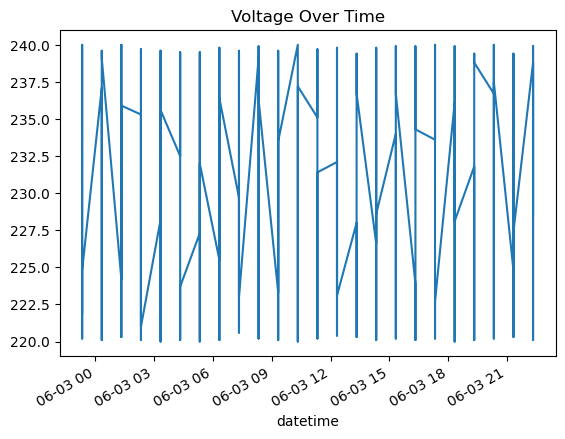

In [33]:
# Analyzing the variance in voltage
df['voltage'].plot(title='Voltage Over Time')

The voltage varies in value between 220V and 240V over time.

3.6.2 Current Variations

<Axes: title={'center': 'Current Over Time'}, xlabel='datetime'>

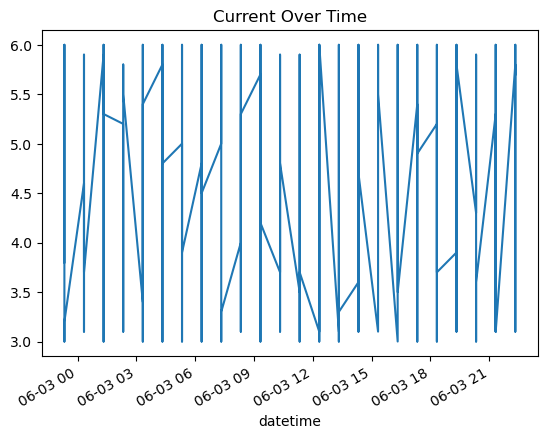

In [34]:
# Analyze the current variations
df['current'].plot(title='Current Over Time')

The current varies in value between 3 Amp and 6 Amp 

### 3.7 Frequency Analysis

<Axes: title={'center': 'Frequency Over Time'}, xlabel='datetime'>

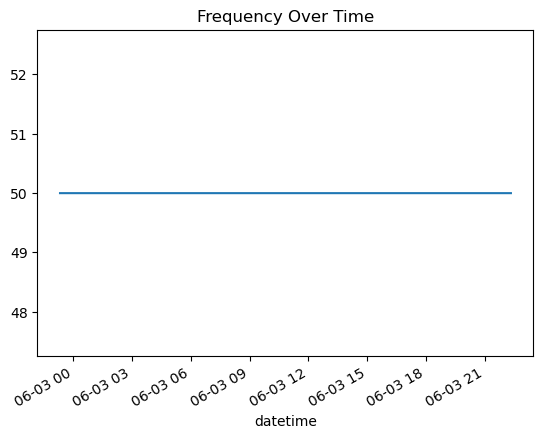

In [35]:
# Analyze frequency stability to ensure it is stable around 50Hz throughout the period under analysis
df['frequency'].plot(title='Frequency Over Time')

The frequency is stabilized at 50Hz throughout the period under review

### 3.8 Consumption Clustering

3.8.1 Clustering Analysis

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

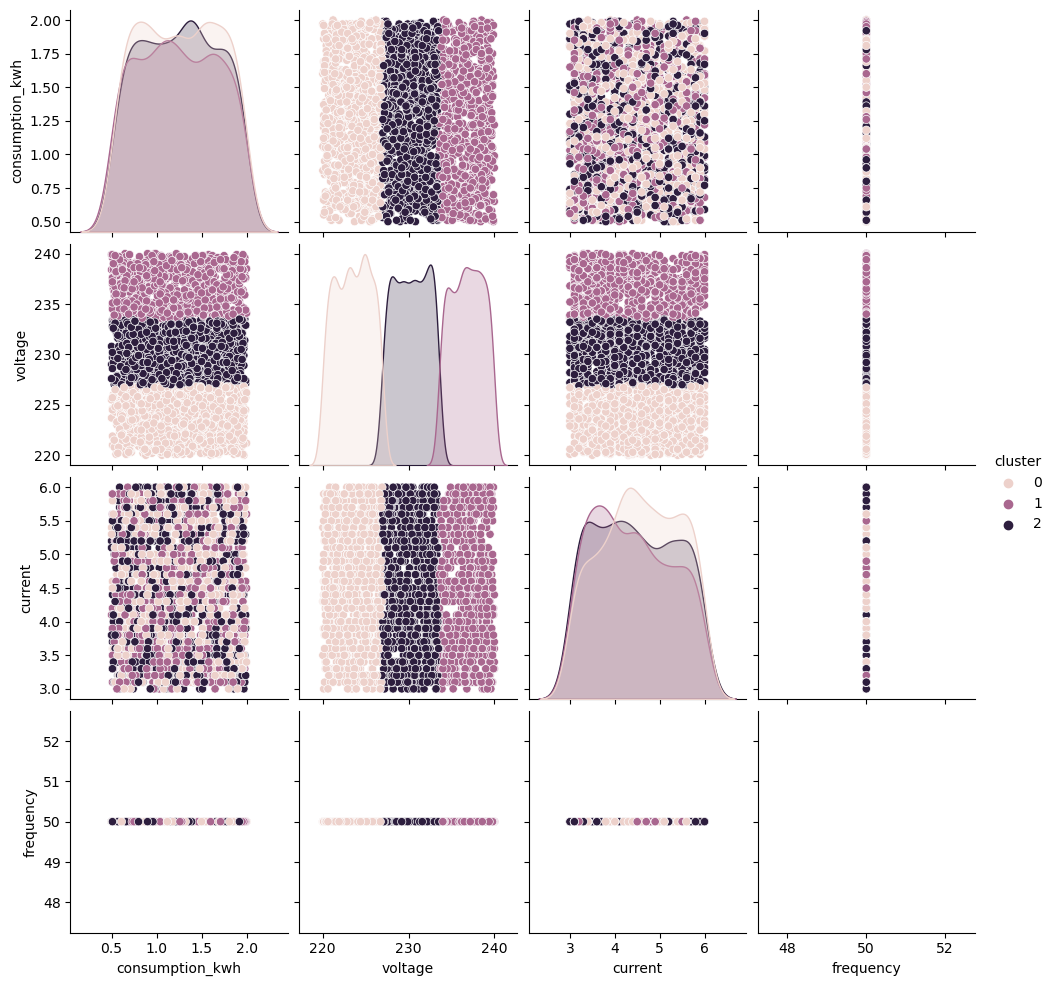

In [36]:
# Apply clustering algorithms (K-Means) to segment meters with similar consumption patterns
from sklearn.cluster import KMeans

X = df[['consumption_kwh', 'voltage', 'current', 'frequency']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['cluster'] = kmeans.labels_

# Plot clusters
sns.pairplot(df, hue='cluster', vars=['consumption_kwh', 'voltage', 'current', 'frequency'])

From the above clustering analysis, it is assumed that the algorithm segmented the consumption patterns into clusters 0, 1, and 2 along the meter id bands (Band 4, Band 5, and Band 6). 

### 3.9 Anomaly Detection

3.9.1 Identify Outliers

We will use a statistical method (z-score) to detect anomalies in consumption, voltage, and current.

In [37]:
# Import zscore
from scipy.stats import zscore

# Calculate z-score for consumption
df['z_score'] = zscore(df['consumption_kwh'])
df[df['z_score'].abs() > 3]

,meter_id,consumption_kwh,voltage,current,frequency,date,time,cluster,z_score
datetime,,,,,,,,,


There are no outliers identified in consumption variable.

In [38]:
# Calculate z-score for voltage
df['z_score'] = zscore(df['voltage'])
df[df['z_score'].abs() > 3]

,meter_id,consumption_kwh,voltage,current,frequency,date,time,cluster,z_score
datetime,,,,,,,,,


There are no outliers identified in voltage variable.

In [39]:
# Calculate z-score for current
df['z_score'] = zscore(df['current'])
df[df['z_score'].abs() > 3]

,meter_id,consumption_kwh,voltage,current,frequency,date,time,cluster,z_score
datetime,,,,,,,,,


There are no outliers identified in current variable.

### 3.10 Limitations 

Below are the limitations I encountered while working on this project:

1. I couldn't lay hold on real smart metering data to analyze the energy consumption amongst households in Nigeria due to bottlenecks from the energy sector regulators and distribution companies (discos). This includes the cloud credentials to access the API real-time, which is usually accessible in other climes.

2. The sample data size used was relatively small compared to the population size with access to electricity or smart meters in Nigeria. Therefore, the results of the analysis conducted might not reflect the real insights we could have gotten if we have access to real data and larger sample size.

## 4.0 Conclusion

In conclusion, the aim of this project, assuming we were able to lay hold on the real smart metering data across all the 11 Discos would have been achieved, which will go a long way in helping the Discos to utilize the insights and recommendations to be derived from the analyses to optimize their business processes, improve service performance, enhance revenue and increase customer performance and efficiency. 

Nonetheless, this aspect of the project serves as a guide for subsequent works to be done in this space once we can lay hold on the real time data that we can use to develop analytic solutions and build Machine Learning models that can be used to improve energy performance and utilization in Nigeria. This is the aim of the project and that still remains my sole objective. 

Appreciation goes to Dr. Abubakar Sani Hassan (PhD) for his help in getting the anonymized dataset from the Jos Distribution Company. 

I am **@olu_olaoye** on [X](https://x.com/olu_olaoye) and on [Medium](https://medium.com/@olumide.olaoye1). Follow me for more exciting articles on data science and analytics. 

Thank you!